# Plots for Workshop

In [15]:
import pickle
import matplotlib.pyplot as plt

In [ ]:
with open("OODness_dictionaries.pkl", "rb") as f:    
    d = pickle.load(f)
print(d)

accuracies_wo = d["accuracies_wo"]
accuracies_wo_std = d["accuracies_wo_std"]
accuracies_with = d["accuracies_with"]
accuracies_with_std = d["accuracies_with_std"]

{'accuracies_wo': {'noise_MNIST': [0.09698016826923077, 0.09803185096153846, 0.09517728365384615, 0.0936748798076923], 'dead_leaves': [0.28812349759615385, 0.36767578125, 0.3905498798076923, 0.4269831730769231], 'FractalDB': [0.10377854567307693, 0.1079852764423077, 0.1429161658653846, 0.19151893028846154], 'stylegan': [0.3390174278846154, 0.37601412259615385, 0.37879356971153844, 0.4562049278846154], 'Shaders21k': [0.25003756009615385, 0.2861328125, 0.2892878605769231, 0.322265625], 'FMNIST': [0.4072265625, 0.4317157451923077, 0.46187650240384615, 0.5325646033653846], 'MNIST': [0.9551908052884616, 0.9625901442307692, 0.9633413461538461, 0.9401667668269231]}, 'accuracies_with': {'noise_MNIST': [0.3257587139423077, 0.5099534254807692, 0.6132436899038461, 0.7606670673076923], 'dead_leaves': [0.5336538461538461, 0.6471228966346154, 0.7395582932692308, 0.82470703125], 'FractalDB': [0.6186899038461539, 0.7045147235576923, 0.7489107572115384, 0.8288010817307692], 'stylegan': [0.5042818509615

In [32]:
print(accuracies_with["noise_MNIST"][2])

0.6132436899038461


In [33]:
for ds in accuracies_with.keys():
    print(ds + ": " + str(accuracies_with[ds][2]))
    


noise_MNIST: 0.6132436899038461
dead_leaves: 0.7395582932692308
FractalDB: 0.7489107572115384
stylegan: 0.6289813701923077
Shaders21k: 0.6217698317307692
FMNIST: 0.6442307692307692
MNIST: 0.9658578725961539


In [34]:
accuracies_wo_10 = {}
accuracies_with_10 = {}

for ds in accuracies_with.keys():
    accuracies_wo_10[ds] = accuracies_wo[ds][2]
    accuracies_with_10[ds] = accuracies_with[ds][2]


old=["noise_MNIST", "dead_leaves",  "stylegan", "Shaders21k", "FractalDB"]
new = ["Noise", "Leaves", "StyleGAN", "Shaders", "Fractal"]

for i in range(len(old)):
    accuracies_with_10[new[i]] = accuracies_with_10.pop(old[i])
    accuracies_wo_10[new[i]] = accuracies_wo_10.pop(old[i])




accuracies_wo_10  = dict(sorted(accuracies_wo_10.items(), key=lambda item: item[1]))
accuracies_with_10= {key: accuracies_with_10[key] for key in accuracies_wo_10}





print(accuracies_wo_10)
print(accuracies_with_10)

{'Noise': 0.09517728365384615, 'Fractal': 0.1429161658653846, 'Shaders': 0.2892878605769231, 'StyleGAN': 0.37879356971153844, 'Leaves': 0.3905498798076923, 'FMNIST': 0.46187650240384615, 'MNIST': 0.9633413461538461}
{'Noise': 0.6132436899038461, 'Fractal': 0.7489107572115384, 'Shaders': 0.6217698317307692, 'StyleGAN': 0.6289813701923077, 'Leaves': 0.7395582932692308, 'FMNIST': 0.6442307692307692, 'MNIST': 0.9658578725961539}


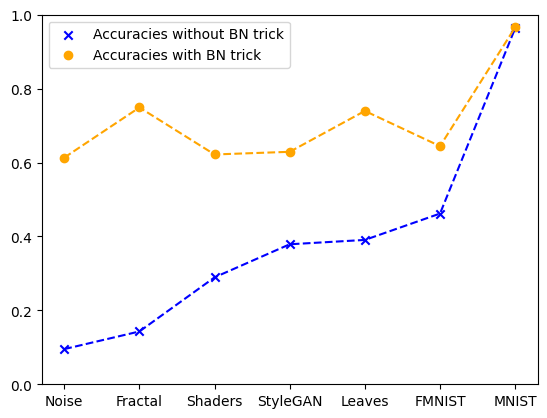

In [35]:
data = list(accuracies_wo_10.keys())
acc_wo = list(accuracies_wo_10.values())
acc_with = list(accuracies_with_10.values())



plt.figure()
plt.ylim(0, 1)

plt.scatter(data, acc_wo, color="blue", label="Accuracies without BN trick", marker="x")
plt.plot(data, acc_wo, color="blue", linestyle="dashed")    

plt.scatter(data, acc_with, color="orange", label="Accuracies with BN trick")
plt.plot(data, acc_with, color="orange", linestyle="dashed")

plt.legend()

plt.savefig("OODness_influence.png")